In [ ]:
# https://drive.google.com/file/d/1vViA8Zi--LANScogg_Ezu7BHli3NQfzV/view?usp=sharing
!gdown '1vViA8Zi--LANScogg_Ezu7BHli3NQfzV'
!mkdir dataset
!unzip -q '/content/archive (14).zip' -d '/content/dataset'

Downloading...
From: https://drive.google.com/uc?id=1vViA8Zi--LANScogg_Ezu7BHli3NQfzV
To: /content/archive (14).zip
100% 9.13k/9.13k [00:00<00:00, 18.9MB/s]
mkdir: cannot create directory ‘dataset’: File exists
replace /content/dataset/diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Data

In [ ]:
# Load the dataset
df = pd.read_csv('/content/dataset/diabetes.csv')
data = df.copy()

In [ ]:
df.shape

(768, 9)

In [ ]:
# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

# EDA data

In [ ]:
# Hiển thị giá trị thiếu
missing_values_df = pd.DataFrame(df, columns=["Missing Values"])

# Hiển thị thống kê mô tả
summary_stats_df = df.describe()

# Xuất kết quả
summary_stats_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Checking for Zeros in the Dataset
# Looping through each column to count the number of zeros present
# Zeros might indicate missing values, data entry errors, or a significant feature of the dataset
for column in data.columns:
    zero_count = (data[column] == 0).sum()  # Counting the number of zeros in each column
    print(f"Zeros in column '{column}': {zero_count}")  # Display the count of zeros for each column

Zeros in column 'Pregnancies': 111
Zeros in column 'Glucose': 5
Zeros in column 'BloodPressure': 35
Zeros in column 'SkinThickness': 227
Zeros in column 'Insulin': 374
Zeros in column 'BMI': 11
Zeros in column 'DiabetesPedigreeFunction': 0
Zeros in column 'Age': 0
Zeros in column 'Outcome': 500


<Figure size 1200x800 with 0 Axes>

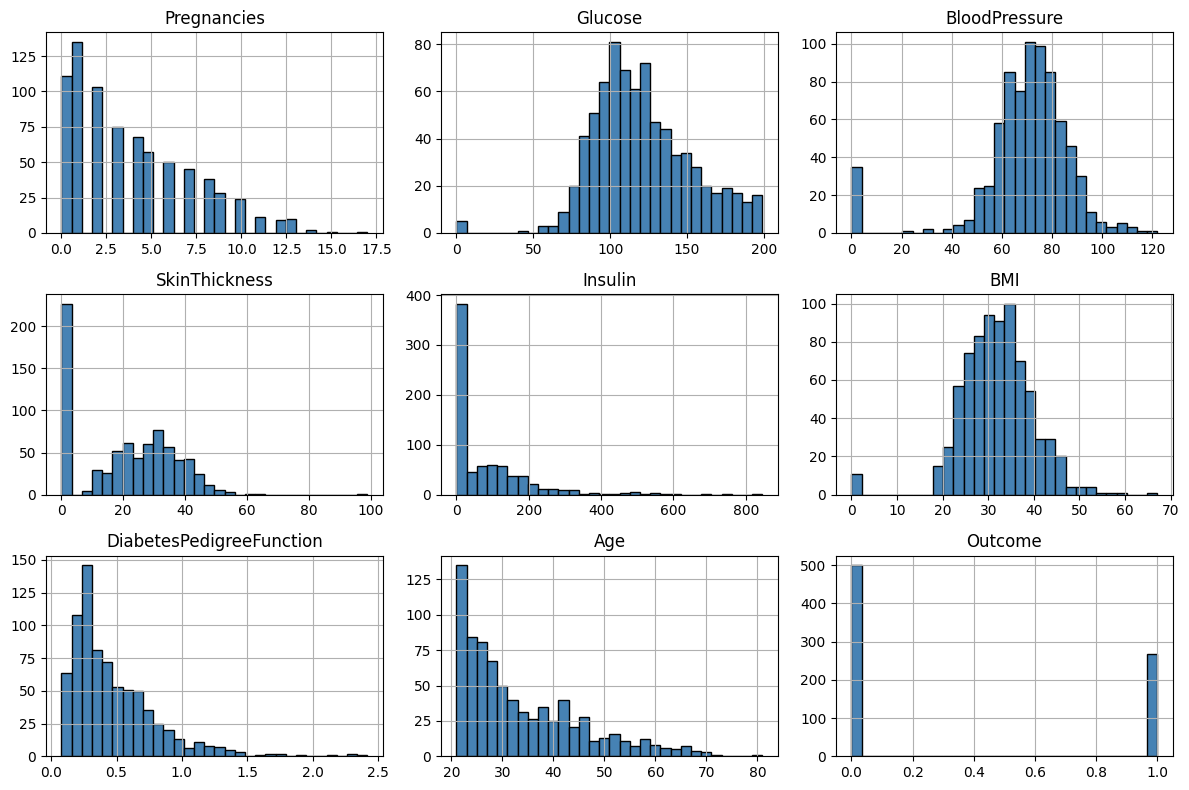

In [ ]:
# Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()

# Thống kê mô tả
summary_stats = df.describe()

# Vẽ biểu đồ phân phối của các biến số
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

Pregnancies: Số lần mang thai

Glucose: Mức glucose trong máu

BloodPressure: Huyết áp (mm Hg)

SkinThickness: Độ dày da (mm)

Insulin: Mức insulin trong máu

BMI: Chỉ số khối cơ thể (Body Mass Index)

DiabetesPedigreeFunction: Chỉ số di truyền về tiểu đường

Age: Tuổi của bệnh nhân

Outcome: Kết quả (1 = mắc bệnh tiểu đường, 0 = không mắc)




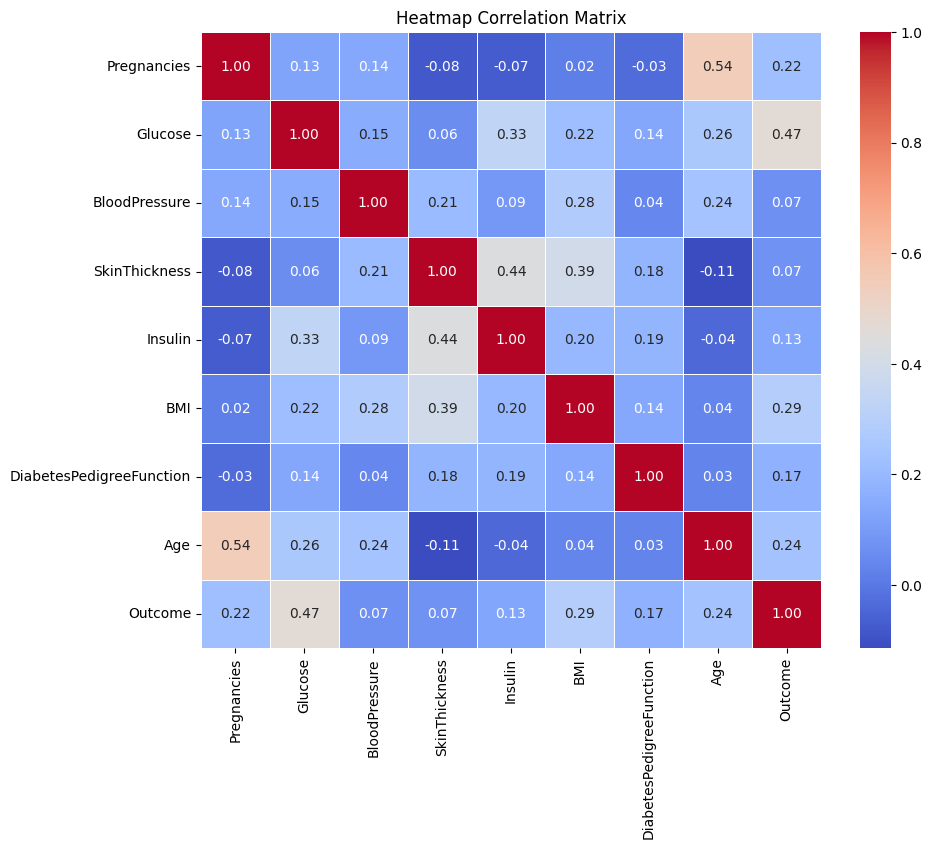

In [ ]:
# Vẽ heatmap để kiểm tra tương quan giữa các biến
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Correlation Matrix")
plt.show()


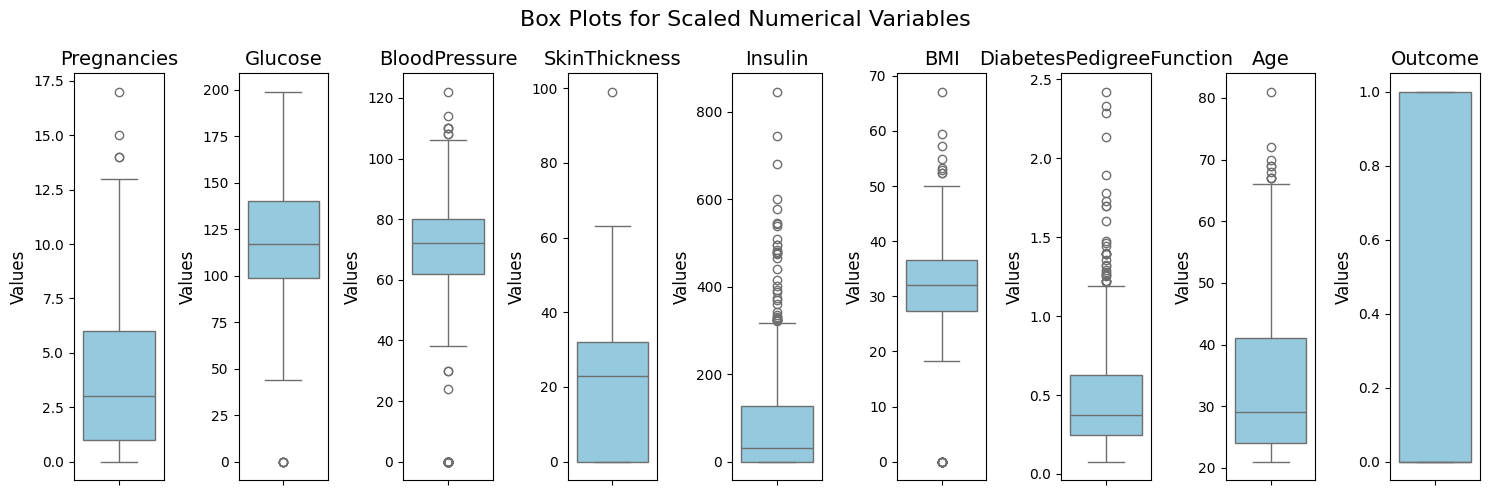

In [ ]:
# Visualizing Outliers using Box Plots
# Creating box plots for each variable to identify potential outliers in the dataset
# Box plots provide a visual representation of the distribution, highlighting outliers as points outside the whiskers

# Create subplots for box plots (1 row and 9 columns, adjust based on the number of features)
fig, axes = plt.subplots(1, 9, figsize=(15, 5))  # 9 columns for visual comparison

# Loop through each column and generate a box plot to visualize the distribution and detect outliers
for i, column in enumerate(data.columns):
    sns.boxplot(y=data[column], ax=axes[i], color="skyblue")  # Box plot for each variable
    axes[i].set_title(column, fontsize=14)  # Set the title for each plot as the column name
    axes[i].set_ylabel("Values", fontsize=12)  # Label for the y-axis

# Overall title for the entire set of box plots
plt.suptitle("Box Plots for Scaled Numerical Variables", fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between plots
plt.show()  # Display the final plot

In [ ]:
# Data Cleaning, Normalization, and Balancing Pipeline
# This pipeline will clean the dataset, handle outliers, impute missing values, normalize, and balance the data, making it suitable for robust machine learning models.

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

feature = ['Insulin', 'BloodPressure', 'SkinThickness', 'BMI']

# Step 1: Z-Score to identify outliers
# The Z-score method flags data points that are more than 3 standard deviations away from the mean as outliers
z_scores = np.abs(zscore(data[feature]))
outliers = (z_scores > 3)  # Flagging outliers as data points with Z-scores greater than 3

# Step 2: IQR Method to Detect Outliers
# The Interquartile Range (IQR) method identifies outliers by checking if data points lie outside of 1.5 * IQR from the 25th (Q1) and 75th (Q3) percentiles
Q1 = data[feature].quantile(0.25)
Q3 = data[feature].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data[feature] < (Q1 - 1.5 * IQR)) |
                     (data[feature] > (Q3 + 1.5 * IQR)))

# Step 3: Replacing Outliers with Median
# After identifying outliers, we replace them with the median of each respective column
data[feature] = data[feature].apply(
    lambda x: x.where(~outlier_condition[x.name], x.median()), axis=0)

# Step 4: Imputing Missing Values
# Using SimpleImputer to replace missing values (if any NaN values remain after handling outliers)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_imputed_copy = data_imputed.copy()

# Step 5: Scaling the Data using RobustScaler
# Applying RobustScaler to scale the data, which is less sensitive to outliers
scaler = RobustScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

# Step 6: Handling Class Imbalance using SMOTE
# SMOTE (Synthetic Minority Over-sampling Technique) is applied to balance the dataset if there's class imbalance (i.e., unequal distribution of target values)
X = data_scaled.drop('Outcome', axis=1)  # Features (excluding target column 'Outcome')
y = data_scaled['Outcome']  # Target variable

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)  # Resample the data to balance the classes

# Combine the resampled features and target back into a single dataframe
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Outcome'] = y_resampled

# Display the final resampled dataset
print(data_resampled.head())  # Preview the first few rows of the balanced dataset

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.751515          0.000        0.37500 -0.270455  0.181818   
1         -0.4 -0.775758         -0.375        0.18750 -0.270455 -0.613636   
2          1.0  1.600000         -0.500       -0.71875 -0.270455 -0.988636   
3         -0.4 -0.678788         -0.375        0.00000  0.584091 -0.443182   
4         -0.6  0.484848         -2.000        0.37500  1.256818  1.261364   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.665359  1.235294      1.0  
1                 -0.056209  0.117647      0.0  
2                  0.783007  0.176471      1.0  
3                 -0.537255 -0.470588      0.0  
4                  5.007843  0.235294      1.0  


# plot data after EDA

<Figure size 1200x800 with 0 Axes>

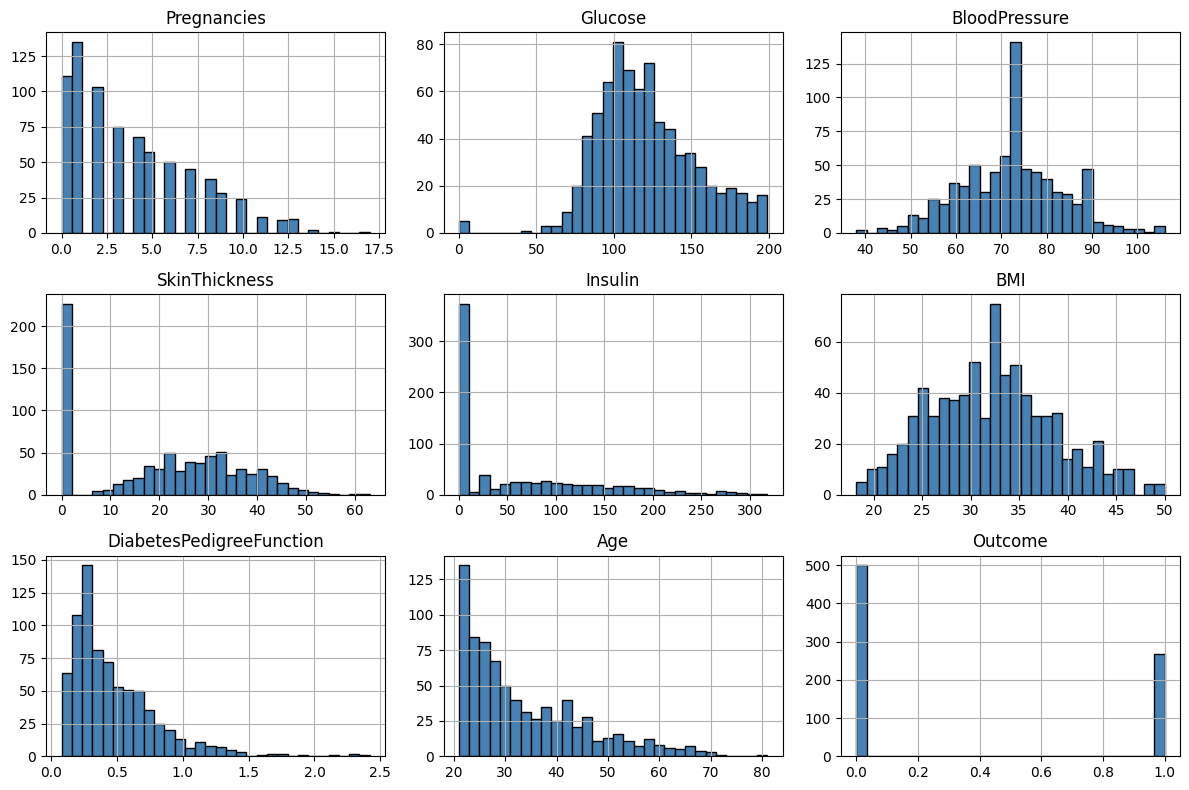

In [ ]:
# Kiểm tra giá trị thiếu
missing_values = data_imputed_copy.isnull().sum()

# Thống kê mô tả
summary_stats = data_imputed_copy.describe()

# Vẽ biểu đồ phân phối của các biến số
plt.figure(figsize=(12, 8))
data_imputed_copy.hist(bins=30, figsize=(12, 8), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

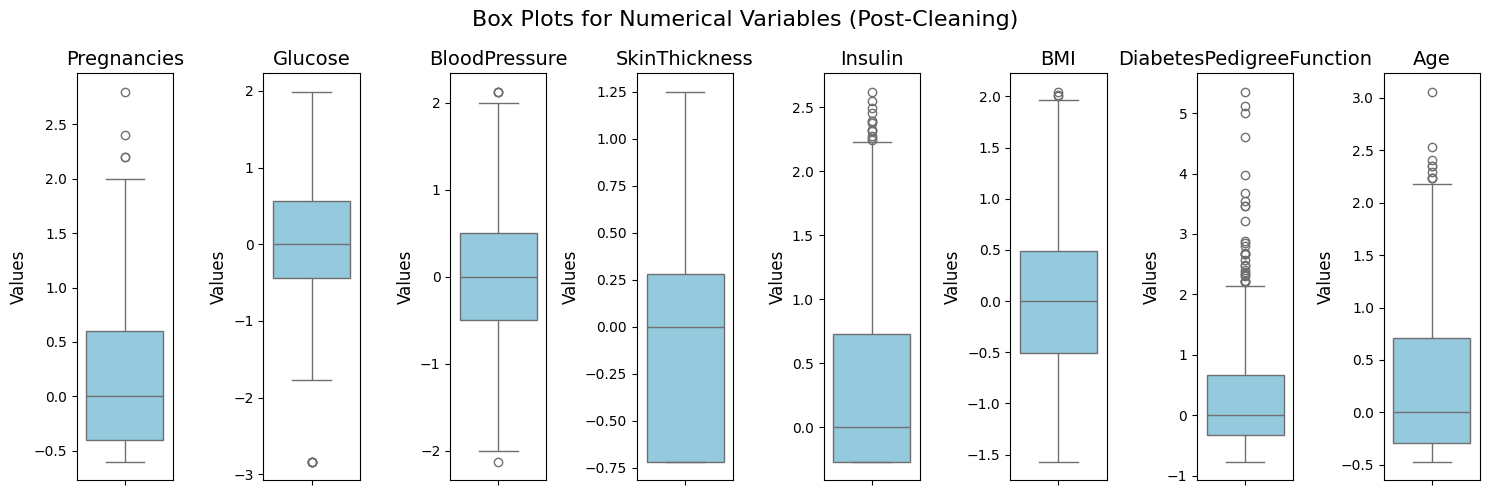

In [ ]:
# Visualizing Outliers in Cleaned Data
# Creating box plots for each numerical variable to observe how outliers have been handled after cleaning
# The comparison between pre-cleaned and cleaned data will help assess the effectiveness of outlier treatment.

# Create subplots for box plots (1 row, 8 columns for each numerical feature)
fig, axes = plt.subplots(1, 8, figsize=(15, 5))  # Adjust the number of columns based on the dataset's variables

# Loop through each numerical column in the dataset and create a box plot to visualize the distribution
for i, column in enumerate(X.columns):
    sns.boxplot(y=X[column], ax=axes[i], color="skyblue")  # Box plot for each variable
    axes[i].set_title(column, fontsize=14)  # Set title for each box plot (column name)
    axes[i].set_ylabel("Values", fontsize=12)  # Set ylabel for clarity

# Overall title for the set of box plots
plt.suptitle("Box Plots for Numerical Variables (Post-Cleaning)", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlap of titles and labels
plt.show()  # Display the final box plots

# Predict with models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chia dữ liệu theo tỷ lệ 70% train, 20% validation, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Kiểm tra kích thước các tập dữ liệu
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Giới hạn số vòng lặp của XGBoost và MLP để tránh quá tải
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_estimators=50),
    "MLP": MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# Lưu kết quả
results = []

# Huấn luyện và đánh giá lại các mô hình
for name, model in models.items():
    model.fit(X_train, y_train)  # Huấn luyện

    y_pred = model.predict(X_test)  # Dự đoán

    # Lưu kết quả
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Chuyển kết quả thành DataFrame và hiển thị
optimized_results_df = pd.DataFrame(results)
optimized_results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.714286,0.608696,0.518519,0.560000
1,Decision Tree,0.772727,0.650794,0.759259,0.700855
2,Random Forest,0.753247,0.673913,0.574074,0.620000
3,XGBoost,0.733766,0.622642,0.611111,0.616822
4,MLP,0.727273,0.607143,0.629630,0.618182


In [ ]:
from sklearn.ensemble import StackingClassifier

# Step 1: Define Base Models for Stacking
# We define three base classifiers (Decision Tree, Random Forest, and Support Vector Machine) to be used in the stacking ensemble.
# These base models will make predictions, and the meta-model will learn from their predictions to improve accuracy.

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=42)  # Decision Tree model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=42)  # Random Forest model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)  # XGBoost model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=1000, random_state=42)  # MLP model

# Step 2: Define Meta Model
# A meta-learner (Logistic Regression) will be trained on the predictions of the base models.
# This will combine the predictions of the base models into a final, stronger prediction.

meta_learner = LogisticRegression()

# Step 3: Create the Stacking Classifier
# The stacking classifier uses the base models and meta-learner to create an ensemble that typically performs better than individual models.
stacking_clf = StackingClassifier(
    estimators=[('dt', dt), ('rf', rf), ('xgb', xgb), ('mlp', mlp)],  # List of base models
    final_estimator=meta_learner  # Meta model
)

# Step 4: Train the Stacking Classifier
# Fit the stacking ensemble model to the training data. The base models will learn from the data, and the meta-model will learn from their predictions.
stacking_clf.fit(X_train, y_train)

# Step 5: Make Predictions on Test Data
# Use the trained stacking model to predict the labels of the test set.
y_pred = stacking_clf.predict(X_test)

result_stacking = []
# Step 6: Evaluate the Model
# Calculate the accuracy of the stacking ensemble on the test set by comparing the predicted labels with the true labels.
result_stacking.append({
        "Model": 'Stacking',
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })
result_stacking

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:33:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:33:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:33:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:33:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[{'Model': 'Stacking',
  'Accuracy': 0.7467532467532467,
  'Precision': 0.6744186046511628,
  'Recall': 0.5370370370370371,
  'F1 Score': 0.5979381443298969}]

In [ ]:
results.append(result_stacking[0])

# Evalution

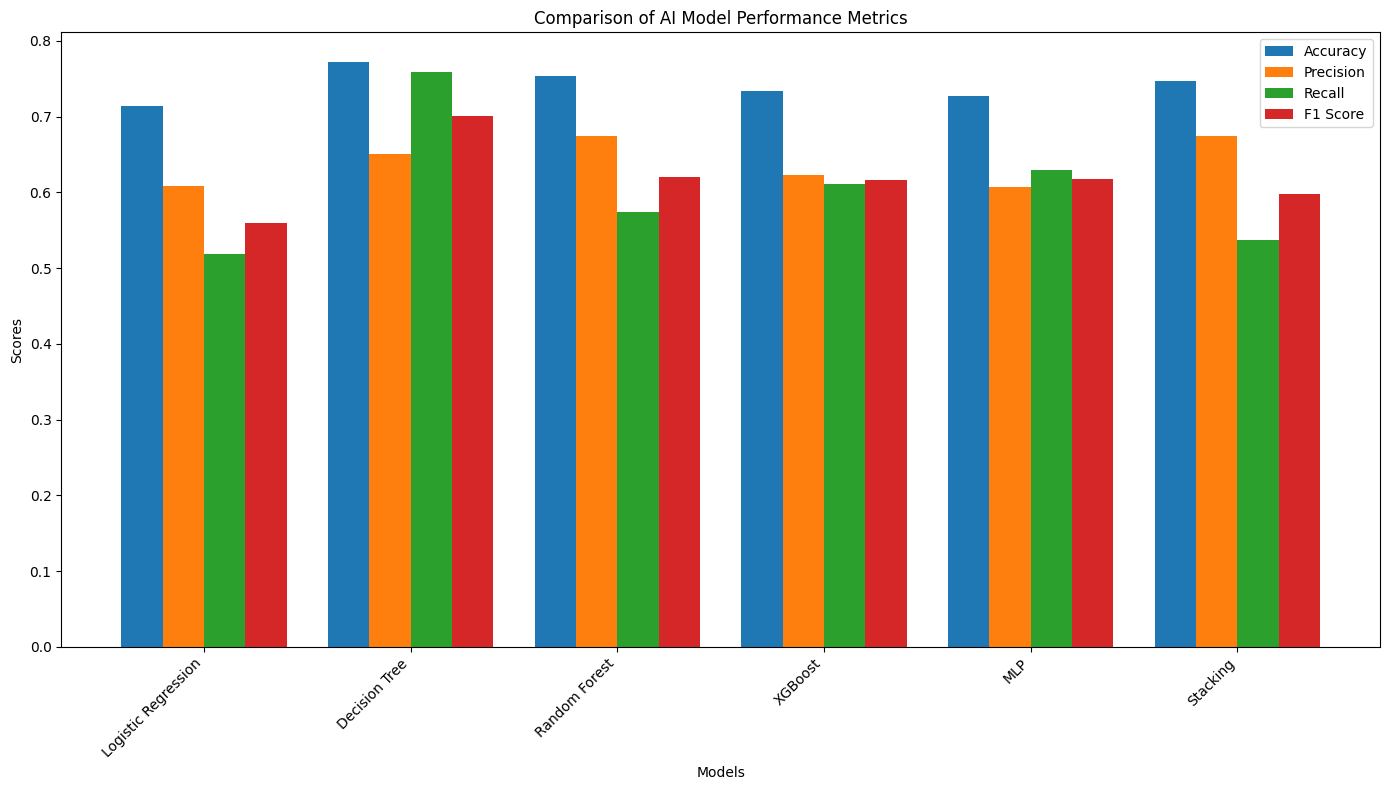

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Chuẩn bị dữ liệu cho biểu đồ
models = [result['Model'] for result in results]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Tạo một từ điển để lưu trữ dữ liệu cho từng chỉ số
data = {metric: [result[metric] for result in results] for metric in metrics}

x = np.arange(len(models))  # Vị trí của các nhãn
width = 0.2  # Độ rộng của các cột

fig, ax = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ cột cho từng chỉ số
for i, metric in enumerate(metrics):
    ax.bar(x + i * width - (width * (len(metrics) - 1) / 2), data[metric], width, label=metric)

# Thêm nhãn, tiêu đề và các nhãn trục x tùy chỉnh
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of AI Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()